In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Goal

Model kickstarter data such that we can predict the success or failure of a project.

## Model

Logisitic regression.

## Objectives

* Given a previously completed campaign, predict success or not success
* Given a live campaign, predict success or not success

## About the Data



In [239]:
data = pd.read_csv('ks-projects-201801.csv')

In [284]:
print(data.columns)

# 'pledged' Pledged amount in the project currency
# 'usd pledged' Amount pledged converted from project currency to USD by Kickstarter
# 'goal' Goal amount in project currency
# 'backers' Number of backers
data.describe()

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'duration',
       'state_enc', 'duration_sec'],
      dtype='object')


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,duration,state_enc,duration_sec
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05,378661,378661.000000,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04,33 days 21:58:10.533968,0.353762,2.930291e+06
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06,65 days 21:55:09.506515,0.478137,5.694910e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,0 days 00:07:17,0.000000,4.370000e+02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03,29 days 02:20:36,0.000000,2.514036e+06
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03,29 days 16:32:32,0.000000,2.565152e+06
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04,36 days 15:35:44,1.000000,3.166544e+06
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08,16738 days 23:00:00,1.000000,1.446246e+09


In [283]:
data.dtypes

ID                            int64
name                         object
category                     object
main_category                object
currency                     object
deadline             datetime64[ns]
goal                        float64
launched             datetime64[ns]
pledged                     float64
state                        object
backers                       int64
country                      object
usd pledged                 float64
usd_pledged_real            float64
usd_goal_real               float64
duration            timedelta64[ns]
state_enc                     int64
duration_sec                float64
dtype: object

In [287]:
data.head(15)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration,state_enc,duration_sec
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,58 days 11:47:32,0,5053652.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,59 days 19:16:03,0,5166963.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,44 days 23:39:10,0,3886750.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,29 days 20:35:49,0,2579749.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,55 days 15:24:57,0,4807497.0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,34 days 10:21:33,1,2974893.0
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,19 days 05:29:16,1,1661356.0
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00,44 days 03:54:48,0,3815688.0
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00,34 days 05:45:17,0,2958317.0
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00,29 days 02:04:12,0,2513052.0


In [241]:
print('max pledged', data.usd_pledged_real.max())
print('mean pledged', data.usd_pledged_real.mean())
print('max backers', np.max(data.backers))

max pledged 20338986.27
mean pledged 9058.924074119337
max backers 219382


In [242]:
print('% successful campaigns', (data[data.state == 'successful'].ID).count() / data.ID.count())

% successful campaigns 0.3537623362321443


### Note that the data doesn't separate end state of campaign (successful, failed) from in-progress lifecycle states

data.state.value_counts()

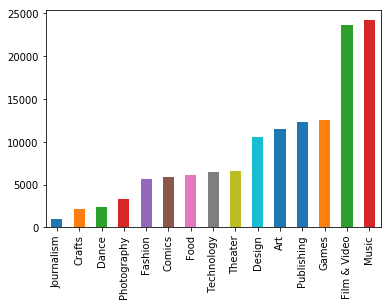

In [243]:
# bar of successes across major categories
# print(data.main_category.unique())
s_cats = data[data.state == 'successful']['main_category'].value_counts(ascending=True)

s_cats.plot.bar()

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


Text(0,0.5,'backers')

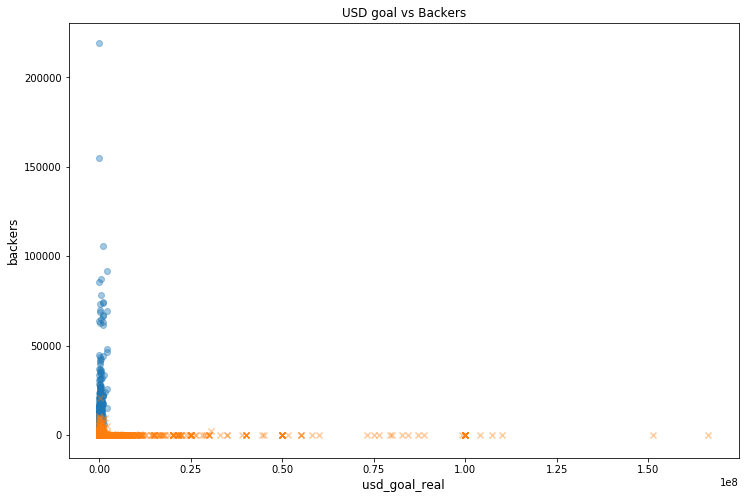

In [244]:
# goal vs backers with status label

print(data.columns)

fig, ax = plt.subplots(figsize=(12, 8))

succ = data[data.state == 'successful']
not_succ = data[data.state != 'successful']

ax.scatter(succ.usd_goal_real, succ.backers, marker='o', alpha=0.4)
ax.scatter(not_succ.usd_goal_real, not_succ.backers, marker='x', alpha=0.4)

ax.set_title('USD goal vs Backers')
ax.set_xlabel('usd_goal_real', size=12)
ax.set_ylabel('backers', size=12)

In [261]:
data.launched = pd.to_datetime(data.launched)
data.deadline = pd.to_datetime(data.deadline)
data['duration'] = data.deadline - data.launched
data['duration_sec'] = data.duration.dt.total_seconds()

print(data.dtypes)

data.head()

ID                            int64
name                         object
category                     object
main_category                object
currency                     object
deadline             datetime64[ns]
goal                        float64
launched             datetime64[ns]
pledged                     float64
state                        object
backers                       int64
country                      object
usd pledged                 float64
usd_pledged_real            float64
usd_goal_real               float64
duration            timedelta64[ns]
state_enc                     int64
duration_sec                float64
dtype: object


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration,state_enc,duration_sec
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58 days 11:47:32,0,5053652.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,59 days 19:16:03,0,5166963.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,44 days 23:39:10,0,3886750.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,29 days 20:35:49,0,2579749.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,55 days 15:24:57,0,4807497.0


156430      7.283333
65731     108.666667
370904    135.116667
244237    163.500000
365411    269.716667
190908    304.833333
335318    312.833333
246603    342.733333
268704    344.766667
184581    347.583333
Name: duration_sec, dtype: float64


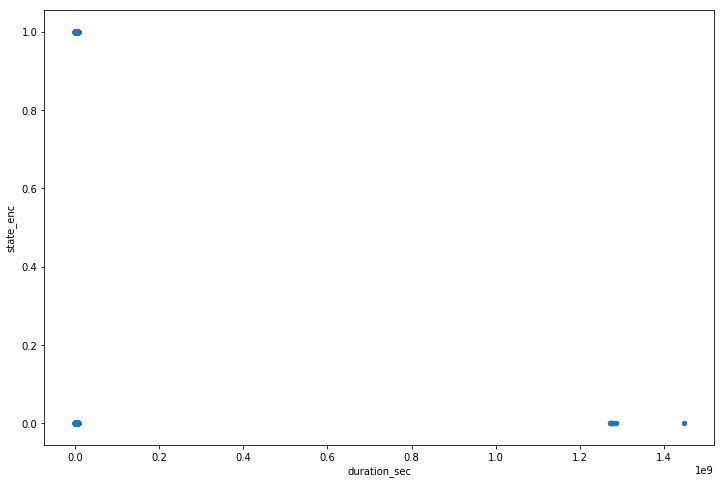

In [281]:
# fix, ax = plt.subplots(figsize=(12, 8))

data['state_enc'] = 0
data.loc[data.state == 'successful', 'state_enc'] = 1

print((data[data.state == 'successful'].sort_values('duration_sec')['duration_sec'] / (60)).head(10))

# ax.scatter(data[data.state == 'successful'].duration.values, data[data.state == 'successful'].state_enc.values, m='o', alpha=0.4)
data.plot.scatter(x='duration_sec', y='state_enc', marker='o', figsize=(12, 8))

In [202]:
data[data.state == 'successful']['ID'].count()

133956

In [11]:
data.count()

ID                  378661
name                378657
category            378661
main_category       378661
currency            378661
deadline            378661
goal                378661
launched            378661
pledged             378661
state               378661
backers             378661
country             378661
usd pledged         374864
usd_pledged_real    378661
usd_goal_real       378661
dtype: int64

In [22]:
print(data.columns)
print(data.count())
print(data.index)

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')
ID                  378661
name                378657
category            378661
main_category       378661
currency            378661
deadline            378661
goal                378661
launched            378661
pledged             378661
state               378661
backers             378661
country             378661
usd pledged         374864
usd_pledged_real    378661
usd_goal_real       378661
dtype: int64
RangeIndex(start=0, stop=378661, step=1)


In [140]:
data.groupby('state')['usd_goal_real', 'usd_pledged_real'].mean()

,usd_goal_real,usd_pledged_real
state,,
canceled,75579.415376,2340.521661
failed,63174.742222,1320.603817
live,62535.280915,5869.166852
successful,9532.853357,22670.795231
suspended,175208.010265,9312.382952
undefined,4103.022038,2212.855236


In [143]:
data.groupby('state')['usd_goal_real', 'usd_pledged_real'].std()

,usd_goal_real,usd_pledged_real
state,,
canceled,1.281389e+06,13524.017702
failed,1.435683e+06,6820.249351
live,1.875468e+06,31430.563304
successful,2.796144e+04,151090.323352
suspended,3.444548e+06,99313.839964
undefined,2.792085e+03,2751.798929


In [142]:
data.groupby('state')['usd_goal_real', 'usd_pledged_real'].max()

,usd_goal_real,usd_pledged_real
state,,
canceled,1.000000e+08,1076751.05
failed,1.663614e+08,757352.94
live,9.900000e+07,724423.80
successful,2.015609e+06,20338986.27
suspended,1.000000e+08,4005111.42
undefined,7.735747e+04,14997.93


In [187]:
data.sort_values('country').groupby(['country', 'state'])['state'].count()

country  state     
AT       canceled          91
         failed           378
         live              15
         successful       107
         suspended          6
AU       canceled        1065
         failed          4606
         live              70
         successful      2010
         suspended         88
BE       canceled          74
         failed           371
         live              12
         successful       152
         suspended          8
CA       canceled        2138
         failed          8236
         live             132
         successful      4134
         suspended        116
CH       canceled          84
         failed           465
         live              14
         successful       187
         suspended         11
DE       canceled         621
         failed          2499
         live              75
         successful       937
         suspended         39
                        ...  
NL       canceled         396
         failed     